In [165]:
#Importing libraries
from collections import Counter

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
from scipy import stats
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
%matplotlib inline


**Introducing the dataset**

In [105]:
#Uploading the dataset
from google.colab import files
uploaded = files.upload()


In [106]:
#Load the datasets
train = pd.read_csv("analyze_unemployement_rate.csv")
train.head()

,Year,Both sexes,Male,Female
0,1998Q1,59.5,72.7,46.8
1,1998Q2,59.6,72.9,46.8
2,1998Q3,61.3,74.6,48.3
3,1998Q4,59.5,72.8,46.6
4,1999Q1,60.4,73.2,48.0


In [107]:
#Checking datatypes
train.dtypes

Year           object
Both sexes    float64
Male          float64
Female        float64
dtype: object

In [108]:
# Displaying the mean , Standard Deviation, Min count and Max Count using describe method
train.describe()

,Both sexes,Male,Female
count,91.000000,91.000000,91.000000
mean,62.798901,71.874725,53.975824
std,1.725141,3.094138,2.673630
min,58.900000,65.100000,46.600000
25%,61.800000,68.950000,52.250000
50%,62.300000,72.500000,55.000000
75%,63.550000,74.500000,55.850000
max,67.400000,77.200000,57.700000


In [109]:
# Displaying numbers of rows and columns
train.shape

(91, 4)

In [110]:
# Information about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        91 non-null     object 
 1   Both sexes  91 non-null     float64
 2   Male        91 non-null     float64
 3   Female      91 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.0+ KB


**Data Manipulation**

In [111]:
train['Year'].head()

0    1998Q1
1    1998Q2
2    1998Q3
3    1998Q4
4    1999Q1
Name: Year, dtype: object

In [112]:
# Splitting the Year column into Years and Quaterly and dropping the old column
train[['Years','Quaterly']] = train.Year.str.split("Q", expand=True)
train.drop(columns =["Year"], inplace = True) 
train.head()

,Both sexes,Male,Female,Years,Quaterly
0,59.5,72.7,46.8,1998,1
1,59.6,72.9,46.8,1998,2
2,61.3,74.6,48.3,1998,3
3,59.5,72.8,46.6,1998,4
4,60.4,73.2,48.0,1999,1


In [113]:
train.dtypes

Both sexes    float64
Male          float64
Female        float64
Years          object
Quaterly       object
dtype: object

In [114]:
# Converting the Quaterly datatype to numeric type
train["Quaterly"] = pd.to_numeric(train["Quaterly"],errors = "coerce")
train.dtypes

Both sexes    float64
Male          float64
Female        float64
Years          object
Quaterly        int64
dtype: object

In [115]:
# Converting the Years datatype to Year type
train['Years'] =  pd.to_numeric(train['Years'],errors="coerce")
train.dtypes

Both sexes    float64
Male          float64
Female        float64
Years           int64
Quaterly        int64
dtype: object

In [116]:
# Checking for null values
train.isnull().sum()

Both sexes    0
Male          0
Female        0
Years         0
Quaterly      0
dtype: int64

**Data Visualization**

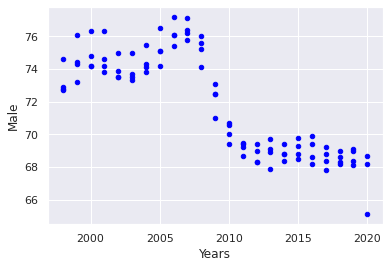

In [117]:
# Showing the relationship of Male unemployement rate over the years
train.plot(x='Years', y='Male', kind='scatter', color='blue')

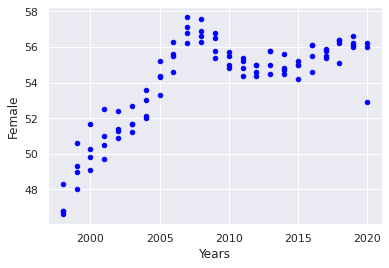

In [118]:
# Showing the relationship of Female unemployement rate over the years
train.plot(x='Years', y='Female', kind='scatter', color='blue')

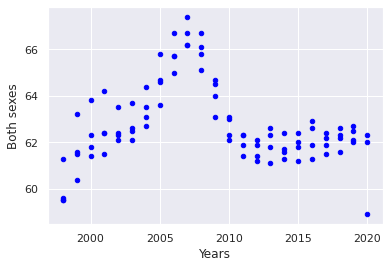

In [119]:
# Showing the relationship of Both Sexes unemployement rate over the years
train.plot(x='Years', y='Both sexes', kind='scatter', color='blue')

In [120]:
# Showing the comparison of unemployement rates between both groups in the year 1998 to 1999
train['Years'].head()
train_1998 = train['Years'] < 2000
train_1998

0      True
1      True
2      True
3      True
4      True
      ...  
86    False
87    False
88    False
89    False
90    False
Name: Years, Length: 91, dtype: bool

In [121]:
year_table = train[train_1998]
year_table.shape

(8, 5)

In [122]:
year_table.head(10)

,Both sexes,Male,Female,Years,Quaterly
0,59.5,72.7,46.8,1998,1
1,59.6,72.9,46.8,1998,2
2,61.3,74.6,48.3,1998,3
3,59.5,72.8,46.6,1998,4
4,60.4,73.2,48.0,1999,1
5,61.5,74.4,49.0,1999,2
6,63.2,76.1,50.6,1999,3
7,61.6,74.3,49.3,1999,4


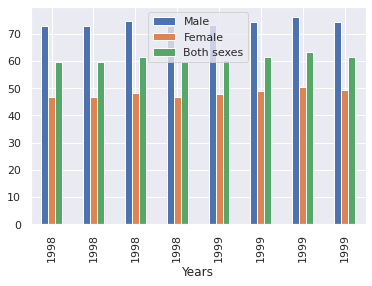

In [123]:
year_table.plot(x="Years", y=["Male", "Female", "Both sexes"], kind="bar")

**Linear Regression**

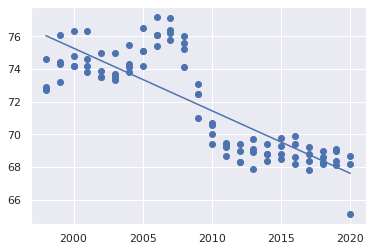

In [124]:
# Applying ML model
# Predicting the value using linear regression
x = train['Years']
y = train['Male']
slope, intercept, r, p, std_err = stats.linregress(x, y)
def calc(x):
  return slope * x + intercept


linear_model = list(map(calc, x))
plt.scatter(x, y)
plt.plot(x, linear_model)
plt.show()

In [125]:
# R value for the model
print(r)

-0.8174840624518861


In [126]:
# Prediction of unemployement rate in the year 2020
male_prediction = calc(2020)
print(male_prediction)

67.61558073654385


**Polynomial Regression**

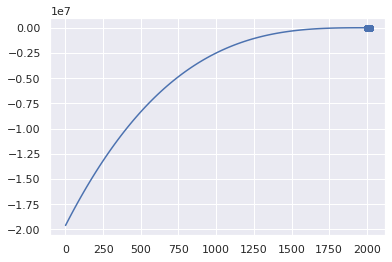

In [127]:
# Predicting the value using polynomial regression
x = train['Years']
y = train['Female']
poly_model = np.poly1d(np.polyfit(x, y, 3))

poly_line = np.linspace(1, 2020, 100)

plt.scatter(x, y)
plt.plot(poly_line, poly_model(poly_line))
plt.show()

In [128]:
# R value for the model
print(r2_score(y, poly_model(x)))

0.8565594226301781


In [129]:
# Prediction of unemployement rate in the year 2021
female_prediction = poly_model(2021)
print(female_prediction)

56.05677451938391


**Splitting the dataset**

In [130]:
# Splitting the dataset and applying the model
x = train['Years']
y= train['Both sexes']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [131]:
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

In [144]:
x_train[:5]

array([[2010],
       [2002],
       [2011],
       [2005],
       [2017]])

**Decision Tree**

In [132]:
deci_tree_model = DecisionTreeRegressor(max_depth = 2).fit(x_train,y_train)

In [133]:
# Prediction on train data

prediction_train_dt = deci_tree_model.predict(x_train)

# Prediction on test data

prediction_test_dt = deci_tree_model.predict(x_test)

In [134]:
# Calculating Mean Square Error and Mean Absolute Error for train data

mean_sqr_error_train_dt = mean_squared_error(y_train, prediction_train_dt)
mean_abs_error_train_dt = mean_absolute_error(y_train, prediction_train_dt)


# Calculating Mean Square Error and Mean Absolute Error for test data

mean_sqr_error_test_dt = mean_squared_error(y_test, prediction_test_dt)
mean_abs_error_test_dt = mean_absolute_error(y_test, prediction_test_dt)


In [135]:
print("Mean Squared Error for Train data = "+str(mean_sqr_error_train_dt))
print("Mean Absolute Error for Train data = "+str(mean_abs_error_train_dt))

print("Mean Squared Error for Test data = "+str(mean_sqr_error_test_dt))
print("Mean Absolute Error for Test data = "+str(mean_abs_error_test_dt))

Mean Squared Error for Train data = 1.0966825856605276
Mean Absolute Error for Train data = 0.7759749455337687
Mean Squared Error for Test data = 1.8700031214614719
Mean Absolute Error for Test data = 1.0503405572755464


In [136]:
# R_square calculation for train data

r2_score(y_train, prediction_train_dt)

0.6120160508350624

In [137]:
# R_square calculation for test data

r2_score(y_test, prediction_test_dt)

0.4383300383995419

**KNN Regressor**

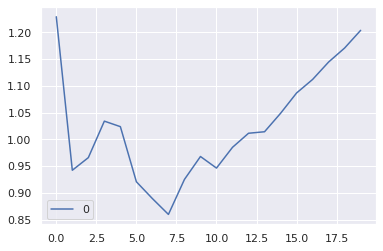

In [156]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [158]:
# At k= 7, the RMSE is approximately .88, and shoots up on further increasing the k value. We can safely say that k=7 will give us the best result in this case.
model = KNeighborsRegressor(n_neighbors = 7)
model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print(f"The Mean square error is {mean_squared_error(y_test,pred)} & the Error is {error}")

The Mean square error is 0.7910633727175099 & the Error is 0.8894174344578084


In [164]:
# Searching for parameters for the ridge model
model_ridge.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>

In [166]:
# Tuning the model using ridge and grid search

parameters = {'fit_intercept':[True,False], 'normalize':[True,False] , 'solver':  ['svd', 'cholesky', 'lsqr', 'sag']}
model_ridge = Ridge()
grid = GridSearchCV(model_ridge,parameters, cv=None)

grid.fit(x_train, y_train)

print('RMSE:',mean_squared_error(grid.predict(x_test),y_test)**0.5)

RMSE: 1.8709370492996946
